In [1]:
import sys
import pandas
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
#import warnings
#from numpy import random
#from numpy import diff
#import os
#warnings.filterwarnings('ignore')
cmap = plt.get_cmap('twilight')

#plotsdir  = '/Users/billiemeadowcroft/Dropbox/Collagen/AFT-Alignment_by_Fourier_Transform-master/MATLAB_implementation/Plotting/Plots/'
datadir0  = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteCollagenIV/Data_and_Figures/NargessExVivoRelaxation/DataOther/'

#datadir2  = '/nfs/scistore15/saricgrp/bmeadowc/Scratch/Collagen/model_strict_tetramer/LargeSystemSeededWorkflow/Data/'
plotsdir  = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteCollagenIV/Data_and_Figures/NargessExVivoRelaxation/Plots/'
clrs = ['#a6611a','#dfc27d','#80cdc1','#018571','steelblue','slateblue']

#sys.setrecursionlimit(100000) 

489600.0
489600.0
489600.0
489600.0
489600.0
489600.0
489600.0
489600.0
102000000.0


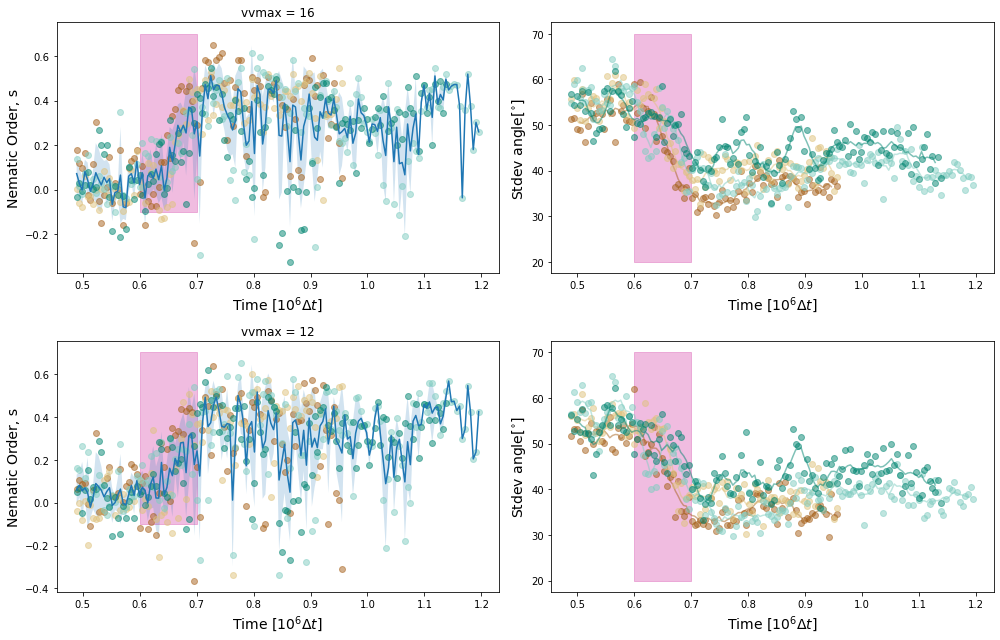

In [4]:
##----- No remodel----#

datadir1 = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteCollagenIV/Data_and_Figures/NargessExVivoRelaxation/DataAFT/NoRemodel/Seed1_vvmax16/'
datadir2 = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteCollagenIV/Data_and_Figures/NargessExVivoRelaxation/DataAFT/NoRemodel/Seed2_vvmax16/'
datadir3 = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteCollagenIV/Data_and_Figures/NargessExVivoRelaxation/DataAFT/NoRemodel/Seed3_vvmax16/'
datadir4 = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteCollagenIV/Data_and_Figures/NargessExVivoRelaxation/DataAFT/NoRemodel/Seed4_vvmax16/'

datadir5 = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteCollagenIV/Data_and_Figures/NargessExVivoRelaxation/DataAFT/NoRemodel/Seed1_vvmax12/'
datadir6 = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteCollagenIV/Data_and_Figures/NargessExVivoRelaxation/DataAFT/NoRemodel/Seed2_vvmax12/'
datadir7 = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteCollagenIV/Data_and_Figures/NargessExVivoRelaxation/DataAFT/NoRemodel/Seed3_vvmax12/'
datadir8 = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteCollagenIV/Data_and_Figures/NargessExVivoRelaxation/DataAFT/NoRemodel/Seed4_vvmax12/'

datadirs = [datadir1,datadir2] #,datadir3,datadir4,datadir5,datadir6]
#labels = ["No Remodel","Remodel NonEquib", "Remodel Equib","EB7"]
#labels = ["No Remodel S1","No Remodel S2", "No Remodel S3","NEQ Equib", "NEQ Equib","EB7","EB8"]
#labels = ["S1","S2", "S3","S4", "NEQ Equib","EB7","EB8"]
#datadirs2 = [datadir1,datadir2,datadir3,datadir4]
fig,ax = plt.subplots(2,2,figsize = (14,9))
for x in range(2):
    if x==0:
        datadirs = [datadir1,datadir2,datadir3,datadir4]
    else:
        datadirs = [datadir5,datadir6,datadir7,datadir8]
    for dd in range(len(datadirs)):
        datadir = datadirs[dd]
        AngleArr1 = pandas.read_csv(datadir+'median_angle.csv', header ='infer')
        Array1 = pandas.read_csv(datadir+'median_order_parameterWtNames.csv', header ='infer')
        Angles1 = AngleArr1.median_angle
        AnglesSTD = AngleArr1.std_angle
        OrderParam = Array1.median_order_parameter
        Names1 = Array1.file_name
        Times1 = []

        for n in range(len(Names1)):
            new_string = ""
            appending = False
            counter = 0
            original_string = Names1[n]
            for char in original_string:
                if counter == 0 and char.isdigit():
                    appending = True  # Set the flag to start appending
                    counter = 1
                if counter == 1 and not char.isdigit(): 
                    appending = False
                    break
                if appending:
                    new_string += char
            Times1.append(float(new_string))
        LenAv = len(OrderParam)
        Times = Times1
        print(Times[0])

        #AvOP = np.mean([OrderParam1,OrderParam2[:len(OrderParam1)]],axis = 0)
        #StdOP = np.std([OrderParam1,OrderParam2[:len(OrderParam1)]],axis = 0)
        #AvAng = np.mean([Angles1,Angles2[:len(Angles1)]],axis = 0)
        #AvStdAng = np.mean([AnglesSTD1,AnglesSTD2[:len(AnglesSTD1)]],axis = 0)

        if dd==0:
            OP_1 = OrderParam
            ASTD_1 = AnglesSTD
            T_1 = Times
        if dd==1:
            OP_2 = OrderParam
            ASTD_2 = AnglesSTD
            T_2 = Times
        if dd==2:
            OP_3 = OrderParam
            ASTD_3 = AnglesSTD
            T_3 = Times
        if dd==3:
            OP_4 = OrderParam
            ASTD_4 = AnglesSTD
            T_4 = Times

        ax[x,0].plot(np.divide(np.add(Times,0),10**6),OrderParam,color = clrs[dd],marker = 'o',alpha = 0.5,linestyle = '')
        Times_ =np.divide(np.add(Times,0),10**6)
        N=6
        AvOPAv = np.convolve(OrderParam, np.ones(N)/N, mode='valid')
        AvStdAngAv = np.convolve(AnglesSTD, np.ones(N)/N, mode='valid')
        #ax[x,0].plot(Times_[int(N/2):-int(N/2)+1],AvOPAv,color = clrs[dd],linestyle = '-')
        #ax[0].plot([0.5,0.9],[np.mean(AvOP[:int(len(AvOP)/2)]),np.mean(AvOP[int(len(AvOP)/2):])])
        #ax[x,0].fill_between(np.divide(np.add(Times,0),10**6),np.add(AvOP,StdOP),np.add(AvOP,-StdOP),alpha = 0.2,color = clrs[1])
        #ax[x,2].plot(np.divide(np.add(Times,0),10**6),AvAng,marker = 'o',alpha = 0.5,linestyle = '',color =clrs[dd])
        ax[x,1].plot(np.divide(np.add(Times,0),10**6),AnglesSTD,marker = 'o',alpha = 0.5,linestyle = '',color = clrs[dd])
        ax[x,1].plot(Times_[int(N/2):-int(N/2)+1],AvStdAngAv,alpha = 0.5,linestyle = '-',color = clrs[dd])
        fs = 14
        #ax[0].set_xlim([0.25,1.13])
        
        #ax[0].set_ylim([-0.15,1])
        ax[x,0].set_ylabel("Nematic Order, s",fontsize = fs)
        #ax[x,2].set_ylabel(r"Average angle/$90^{\circ}$",fontsize = fs)
        ax[x,1].set_ylabel(r"Stdev angle$[^{\circ}]$",fontsize = fs)
        ax[x,0].set_xlabel(r"Time [$10^6\Delta t$]",fontsize =fs)
        #ax[x,2].set_xlabel(r"Time [$10^6\Delta t$]",fontsize =fs)
        ax[x,1].set_xlabel(r"Time [$10^6\Delta t$]",fontsize =fs)

        ax[x,0].fill_between([0.6,0.7],[-0.1,-0.1],[0.7,0.7],alpha = 0.15,color = 'tab:pink')
        #ax[x,2].fill_between([0.6,0.7],[0,0],[0.5,0.5],alpha = 0.15,color = 'tab:pink')
        ax[x,1].fill_between([0.6,0.7],[20,20],[70,70],alpha = 0.15,color = 'tab:pink')
    arrays = [OP_1, OP_2, OP_3, OP_4]
    timearray = [T_1,T_2,T_3,T_4]
    max_length = max(len(arr) for arr in arrays)
    #timeMax = np.max([len(OP_1),len(OP_2),len(OP_3), len(OP_4)]) #,len(OP_3)])
    padded_arrays = []
    counts = np.zeros(max_length)

    # Pad each array with np.nan to the length of the longest array and count valid entries
    for arr in arrays:
        padded_array = np.pad(arr, (0, max_length - len(arr)), constant_values=np.nan)
        padded_arrays.append(padded_array)
        counts[:len(arr)] += 1
    # Calculate the average while ignoring np.nan values
    average = np.nanmean(padded_arrays, axis=0)
    global_tend = max(time[-1] for time in timearray)
    # Calculate the standard deviation while ignoring np.nan values
    std_dev = np.nanstd(padded_arrays, axis=0)
    # Convert list of padded arrays to a numpy array
    padded_arrays = np.array(padded_arrays)
    if x==0:
        averageNR = average
        time1 = np.linspace(489600,global_tend,len(average))*(1/10**6)
        std_devNR = std_dev
    
    ax[x,0].plot(np.linspace(489600,global_tend,len(average))*(1/10**6),average)
    ax[x,0].fill_between(np.linspace(489600,global_tend,len(average))*(1/10**6),np.add(average,std_dev),np.add(average,-std_dev),alpha = 0.2)
    #ax[x,0].legend(frameon=False)
ax[0,0].set_title("vvmax = 16",fontsize = 12)
ax[1,0].set_title("vvmax = 12",fontsize = 12)
fig.tight_layout()
print(489600*(10**6/4800))
plotname = "OP_and_Angles_NoRemodel.pdf"
fig.savefig(plotsdir+plotname)

300000.0
300000.0
300000.0
300000.0
102000000.0


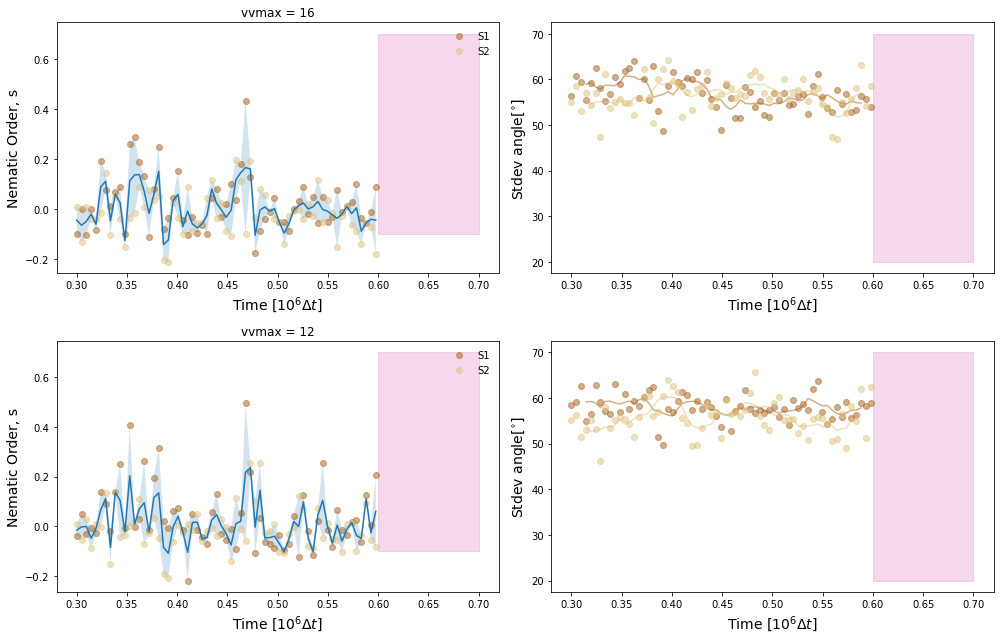

In [5]:
##----- No stretch----#

datadir1 = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteCollagenIV/Data_and_Figures/NargessExVivoRelaxation/DataAFT/NoStretch/Seed1_vvmax16/'
datadir2 = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteCollagenIV/Data_and_Figures/NargessExVivoRelaxation/DataAFT/NoStretch/Seed2_vvmax16/'

datadir5 = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteCollagenIV/Data_and_Figures/NargessExVivoRelaxation/DataAFT/NoStretch/Seed1_vvmax12/'
datadir6 = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteCollagenIV/Data_and_Figures/NargessExVivoRelaxation/DataAFT/NoStretch/Seed2_vvmax12/'

datadirs = [datadir1,datadir2] #,datadir3,datadir4,datadir5,datadir6]
labels = ["No Remodel","Remodel NonEquib", "Remodel Equib","EB7"]
labels = ["No Remodel S1","No Remodel S2", "No Remodel S3","NEQ Equib", "NEQ Equib","EB7","EB8"]
labels = ["S1","S2", "S3","S4", "NEQ Equib","EB7","EB8"]
#datadirs2 = [datadir1,datadir2,datadir3,datadir4]
fig,ax = plt.subplots(2,2,figsize = (14,9))
for x in range(2):
    if x==0:
        datadirs = [datadir1,datadir2]
    else:
        datadirs = [datadir5,datadir6]
    for dd in range(len(datadirs)):
        datadir = datadirs[dd]
        AngleArr1 = pandas.read_csv(datadir+'median_angle.csv', header ='infer')
        Array1 = pandas.read_csv(datadir+'median_order_parameterWtNames.csv', header ='infer')
        Angles1 = AngleArr1.median_angle
        AnglesSTD = AngleArr1.std_angle
        OrderParam = Array1.median_order_parameter
        Names1 = Array1.file_name
        Times1 = []

        for n in range(len(Names1)):
            new_string = ""
            appending = False
            counter = 0
            original_string = Names1[n]
            for char in original_string:
                if counter == 0 and char.isdigit():
                    appending = True  # Set the flag to start appending
                    counter = 1
                if counter == 1 and not char.isdigit(): 
                    appending = False
                    break
                if appending:
                    new_string += char
            Times1.append(float(new_string))
        LenAv = len(OrderParam)
        Times = Times1
        print(Times[0])

        #AvOP = np.mean([OrderParam1,OrderParam2[:len(OrderParam1)]],axis = 0)
        #StdOP = np.std([OrderParam1,OrderParam2[:len(OrderParam1)]],axis = 0)
        #AvAng = np.mean([Angles1,Angles2[:len(Angles1)]],axis = 0)
        #AvStdAng = np.mean([AnglesSTD1,AnglesSTD2[:len(AnglesSTD1)]],axis = 0)

        if dd==0:
            OP_1 = OrderParam
            ASTD_1 = AnglesSTD
            T_1 = Times
        if dd==1:
            OP_2 = OrderParam
            ASTD_2 = AnglesSTD
            T_2 = Times
        #if dd==2:
          #  OP_3 = OrderParam
         #   ASTD_3 = AnglesSTD
          #  T_3 = Times
        #if dd==3:
         #   OP_4 = OrderParam
         #   ASTD_4 = AnglesSTD
          #  T_4 = Times

        ax[x,0].plot(np.divide(np.add(Times,0),10**6),OrderParam,color = clrs[dd],marker = 'o',alpha = 0.5,linestyle = '',label= labels[dd])
        Times_ =np.divide(np.add(Times,0),10**6)
        N=6
        AvOPAv = np.convolve(OrderParam, np.ones(N)/N, mode='valid')
        AvStdAngAv = np.convolve(AnglesSTD, np.ones(N)/N, mode='valid')
        #ax[x,0].plot(Times_[int(N/2):-int(N/2)+1],AvOPAv,color = clrs[dd],linestyle = '-')
        #ax[0].plot([0.5,0.9],[np.mean(AvOP[:int(len(AvOP)/2)]),np.mean(AvOP[int(len(AvOP)/2):])])
        #ax[x,0].fill_between(np.divide(np.add(Times,0),10**6),np.add(AvOP,StdOP),np.add(AvOP,-StdOP),alpha = 0.2,color = clrs[1])
        #ax[x,2].plot(np.divide(np.add(Times,0),10**6),AvAng,marker = 'o',alpha = 0.5,linestyle = '',color =clrs[dd])
        ax[x,1].plot(np.divide(np.add(Times,0),10**6),AnglesSTD,marker = 'o',alpha = 0.5,linestyle = '',color = clrs[dd])
        ax[x,1].plot(Times_[int(N/2):-int(N/2)+1],AvStdAngAv,alpha = 0.5,linestyle = '-',color = clrs[dd])
        fs = 14
        #ax[0].set_xlim([0.25,1.13])
        
        #ax[0].set_ylim([-0.15,1])
        ax[x,0].set_ylabel("Nematic Order, s",fontsize = fs)
        #ax[x,2].set_ylabel(r"Average angle/$90^{\circ}$",fontsize = fs)
        ax[x,1].set_ylabel(r"Stdev angle$[^{\circ}]$",fontsize = fs)
        ax[x,0].set_xlabel(r"Time [$10^6\Delta t$]",fontsize =fs)
        #ax[x,2].set_xlabel(r"Time [$10^6\Delta t$]",fontsize =fs)
        ax[x,1].set_xlabel(r"Time [$10^6\Delta t$]",fontsize =fs)

        ax[x,0].fill_between([0.6,0.7],[-0.1,-0.1],[0.7,0.7],alpha = 0.15,color = 'tab:pink')
        #ax[x,2].fill_between([0.6,0.7],[0,0],[0.5,0.5],alpha = 0.15,color = 'tab:pink')
        ax[x,1].fill_between([0.6,0.7],[20,20],[70,70],alpha = 0.15,color = 'tab:pink')
    arrays = [OP_1, OP_2]
    timearray = [T_1,T_2]
    max_length = max(len(arr) for arr in arrays)
    #timeMax = np.max([len(OP_1),len(OP_2),len(OP_3), len(OP_4)]) #,len(OP_3)])
    padded_arrays = []
    counts = np.zeros(max_length)

    # Pad each array with np.nan to the length of the longest array and count valid entries
    for arr in arrays:
        padded_array = np.pad(arr, (0, max_length - len(arr)), constant_values=np.nan)
        padded_arrays.append(padded_array)
        counts[:len(arr)] += 1

    # Convert list of padded arrays to a numpy array
    padded_arrays = np.array(padded_arrays)

    # Calculate the average while ignoring np.nan values
    average = np.nanmean(padded_arrays, axis=0)
    global_tend = max(time[-1] for time in timearray)
    # Calculate the standard deviation while ignoring np.nan values
    std_dev = np.nanstd(padded_arrays, axis=0)
    if x==1:
        averageNS = average
        time2 = np.linspace(300000,global_tend,len(average))*(1/10**6)
        std_devNS = std_dev
    ax[x,0].plot(np.linspace(300000,global_tend,len(average))*(1/10**6),average)
    ax[x,0].fill_between(np.linspace(300000,global_tend,len(average))*(1/10**6),np.add(average,std_dev),np.add(average,-std_dev),alpha = 0.2)
    ax[x,0].legend(frameon=False)
ax[0,0].set_title("vvmax = 16",fontsize = 12)
ax[1,0].set_title("vvmax = 12",fontsize = 12)
fig.tight_layout()
print(489600*(10**6/4800))
plotname = "OP_and_Angles_NoStretch.pdf"
fig.savefig(plotsdir+plotname)

300000.0
300000.0
300000.0
300000.0
102000000.0
181
72.4


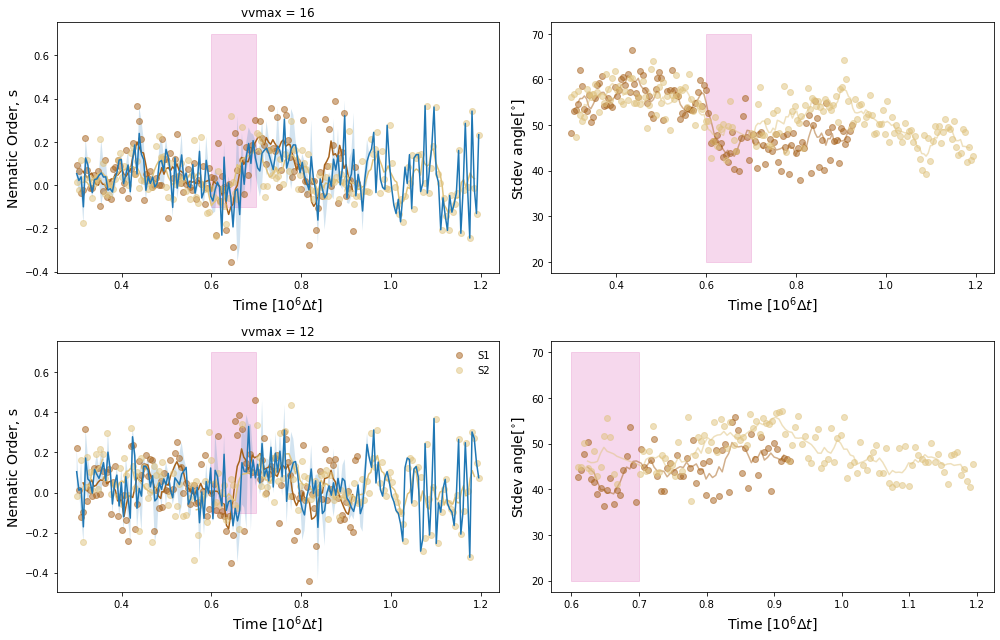

In [6]:
##----- 7s Pertrubation----#

datadir1 = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteCollagenIV/Data_and_Figures/NargessExVivoRelaxation/DataAFT/7S_Perturb/Seed1_vvmax16/'
datadir2 = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteCollagenIV/Data_and_Figures/NargessExVivoRelaxation/DataAFT/7S_Perturb/Seed2_vvmax16/'

datadir5 = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteCollagenIV/Data_and_Figures/NargessExVivoRelaxation/DataAFT/7S_Perturb/Seed1_vvmax12/'
datadir6 = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteCollagenIV/Data_and_Figures/NargessExVivoRelaxation/DataAFT/7S_Perturb/Seed2_vvmax12/'

datadirs = [datadir1,datadir2] #,datadir3,datadir4,datadir5,datadir6]
labels = ["No Remodel","Remodel NonEquib", "Remodel Equib","EB7"]
labels = ["No Remodel S1","No Remodel S2", "No Remodel S3","NEQ Equib", "NEQ Equib","EB7","EB8"]
labels = ["S1","S2", "S3","S4", "NEQ Equib","EB7","EB8"]
#datadirs2 = [datadir1,datadir2,datadir3,datadir4]
fig,ax = plt.subplots(2,2,figsize = (14,9))
for x in range(2):
    if x==0:
        datadirs = [datadir1,datadir2]
    else:
        datadirs = [datadir5,datadir6]
    for dd in range(len(datadirs)):
        datadir = datadirs[dd]
        AngleArr1 = pandas.read_csv(datadir+'median_angle.csv', header ='infer')
        Array1 = pandas.read_csv(datadir+'median_order_parameterWtNames.csv', header ='infer')
        Angles1 = AngleArr1.median_angle
        AnglesSTD = AngleArr1.std_angle
        OrderParam = Array1.median_order_parameter
        Names1 = Array1.file_name
        Times1 = []

        for n in range(len(Names1)):
            new_string = ""
            appending = False
            counter = 0
            original_string = Names1[n]
            for char in original_string:
                if counter == 0 and char.isdigit():
                    appending = True  # Set the flag to start appending
                    counter = 1
                if counter == 1 and not char.isdigit(): 
                    appending = False
                    break
                if appending:
                    new_string += char
            Times1.append(float(new_string))
        LenAv = len(OrderParam)
        Times = Times1
        print(Times[0])

        #AvOP = np.mean([OrderParam1,OrderParam2[:len(OrderParam1)]],axis = 0)
        #StdOP = np.std([OrderParam1,OrderParam2[:len(OrderParam1)]],axis = 0)
        #AvAng = np.mean([Angles1,Angles2[:len(Angles1)]],axis = 0)
        #AvStdAng = np.mean([AnglesSTD1,AnglesSTD2[:len(AnglesSTD1)]],axis = 0)

        if dd==0:
            OP_1 = OrderParam
            ASTD_1 = AnglesSTD
            T_1 = Times
        if dd==1:
            OP_2 = OrderParam
            ASTD_2 = AnglesSTD
            T_2 = Times
        #if dd==2:
          #  OP_3 = OrderParam
         #   ASTD_3 = AnglesSTD
          #  T_3 = Times
        #if dd==3:
         #   OP_4 = OrderParam
         #   ASTD_4 = AnglesSTD
          #  T_4 = Times

        ax[x,0].plot(np.divide(np.add(Times,0),10**6),OrderParam,color = clrs[dd],marker = 'o',alpha = 0.5,linestyle = '',label= labels[dd])
        Times_ =np.divide(np.add(Times,0),10**6)
        N=6
        AvOPAv = np.convolve(OrderParam, np.ones(N)/N, mode='valid')
        AvStdAngAv = np.convolve(AnglesSTD, np.ones(N)/N, mode='valid')
        ax[x,0].plot(Times_[int(N/2):-int(N/2)+1],AvOPAv,color = clrs[dd],linestyle = '-')
        #ax[0].plot([0.5,0.9],[np.mean(AvOP[:int(len(AvOP)/2)]),np.mean(AvOP[int(len(AvOP)/2):])])
        #ax[x,0].fill_between(np.divide(np.add(Times,0),10**6),np.add(AvOP,StdOP),np.add(AvOP,-StdOP),alpha = 0.2,color = clrs[1])
        #ax[x,2].plot(np.divide(np.add(Times,0),10**6),AvAng,marker = 'o',alpha = 0.5,linestyle = '',color =clrs[dd])
        ax[x,1].plot(np.divide(np.add(Times,0),10**6),AnglesSTD,marker = 'o',alpha = 0.5,linestyle = '',color = clrs[dd])
        ax[x,1].plot(Times_[int(N/2):-int(N/2)+1],AvStdAngAv,alpha = 0.5,linestyle = '-',color = clrs[dd])
        fs = 14
        #ax[0].set_xlim([0.25,1.13])
        
        #ax[0].set_ylim([-0.15,1])
        ax[x,0].set_ylabel("Nematic Order, s",fontsize = fs)
        #ax[x,2].set_ylabel(r"Average angle/$90^{\circ}$",fontsize = fs)
        ax[x,1].set_ylabel(r"Stdev angle$[^{\circ}]$",fontsize = fs)
        ax[x,0].set_xlabel(r"Time [$10^6\Delta t$]",fontsize =fs)
        #ax[x,2].set_xlabel(r"Time [$10^6\Delta t$]",fontsize =fs)
        ax[x,1].set_xlabel(r"Time [$10^6\Delta t$]",fontsize =fs)

        ax[x,0].fill_between([0.6,0.7],[-0.1,-0.1],[0.7,0.7],alpha = 0.15,color = 'tab:pink')
        #ax[x,2].fill_between([0.6,0.7],[0,0],[0.5,0.5],alpha = 0.15,color = 'tab:pink')
        ax[x,1].fill_between([0.6,0.7],[20,20],[70,70],alpha = 0.15,color = 'tab:pink')
        
    arrays = [OP_1, OP_2]
    timearray = [T_1,T_2]
    max_length = max(len(arr) for arr in arrays)
    #timeMax = np.max([len(OP_1),len(OP_2),len(OP_3), len(OP_4)]) #,len(OP_3)])
    padded_arrays = []
    counts = np.zeros(max_length)

    # Pad each array with np.nan to the length of the longest array and count valid entries
    for arr in arrays:
        padded_array = np.pad(arr, (0, max_length - len(arr)), constant_values=np.nan)
        padded_arrays.append(padded_array)
        counts[:len(arr)] += 1

    # Convert list of padded arrays to a numpy array
    padded_arrays = np.array(padded_arrays)

    # Calculate the average while ignoring np.nan values
    average = np.nanmean(padded_arrays, axis=0)
    global_tend = max(time[-1] for time in timearray)
    # Calculate the standard deviation while ignoring np.nan values
    std_dev = np.nanstd(padded_arrays, axis=0)
    if x==1:
        average7S = average
        time3 = np.linspace(300000,global_tend,len(average7S))*(1/10**6)
        std_dev7S = std_dev
    ax[x,0].plot(np.linspace(300000,global_tend,len(average))*(1/10**6),average)
    ax[x,0].fill_between(np.linspace(300000,global_tend,len(average))*(1/10**6),np.add(average,std_dev),np.add(average,-std_dev),alpha = 0.2)
ax[x,0].legend(frameon=False)
ax[0,0].set_title("vvmax = 16",fontsize = 12)
ax[1,0].set_title("vvmax = 12",fontsize = 12)
fig.tight_layout()
print(489600*(10**6/4800))
print(len(time3))
print(181*0.4)
#plotname = "OP_and_Angles.pdf"
#fig.savefig(plotsdir+plotname)

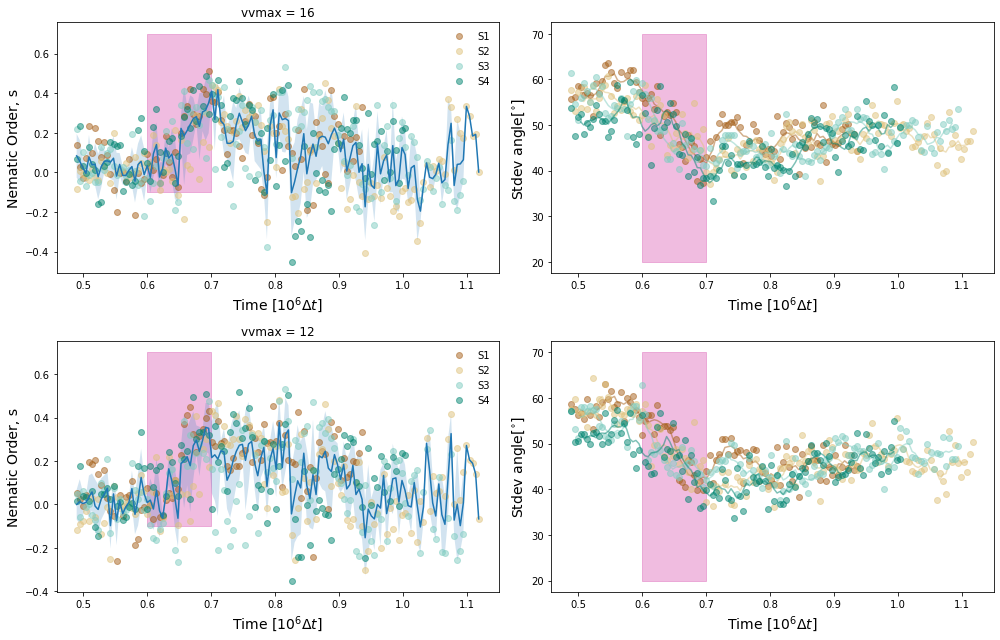

In [7]:
##----- Remodel----#

datadir1 = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteCollagenIV/Data_and_Figures/NargessExVivoRelaxation/DataAFT/Remodel/Seed1_vvmax16/'
datadir2 = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteCollagenIV/Data_and_Figures/NargessExVivoRelaxation/DataAFT/Remodel/Seed2_vvmax16/'
datadir3 = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteCollagenIV/Data_and_Figures/NargessExVivoRelaxation/DataAFT/Remodel/Seed3_vvmax16/'
datadir4 = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteCollagenIV/Data_and_Figures/NargessExVivoRelaxation/DataAFT/Remodel/Seed4_vvmax16/'

datadir5 = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteCollagenIV/Data_and_Figures/NargessExVivoRelaxation/DataAFT/Remodel/Seed1_vvmax12/'
datadir6 = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteCollagenIV/Data_and_Figures/NargessExVivoRelaxation/DataAFT/Remodel/Seed2_vvmax12/'
datadir7 = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteCollagenIV/Data_and_Figures/NargessExVivoRelaxation/DataAFT/Remodel/Seed3_vvmax12/'
datadir8 = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteCollagenIV/Data_and_Figures/NargessExVivoRelaxation/DataAFT/Remodel/Seed4_vvmax12/'

datadirs = [datadir1,datadir2] #,datadir3,datadir4,datadir5,datadir6]
labels = ["No Remodel","Remodel NonEquib", "Remodel Equib","EB7"]
labels = ["S1","S2", "S3","S4", "NEQ Equib","EB7","EB8"]
#datadirs2 = [datadir1,datadir2,datadir3,datadir4]
fig,ax = plt.subplots(2,2,figsize = (14,9))
for x in range(2):
    if x==0:
        datadirs = [datadir1,datadir2,datadir3,datadir4]
    else:
        datadirs = [datadir5,datadir6,datadir7,datadir8]
    for dd in range(len(datadirs)):
        datadir = datadirs[dd]
        AngleArr1 = pandas.read_csv(datadir+'median_angle.csv', header ='infer')
        Array1 = pandas.read_csv(datadir+'median_order_parameterWtNames.csv', header ='infer')
        Angles1 = AngleArr1.median_angle
        AnglesSTD = AngleArr1.std_angle
        OrderParam = Array1.median_order_parameter
        Names1 = Array1.file_name
        Times1 = []

        for n in range(len(Names1)):
            new_string = ""
            appending = False
            counter = 0
            original_string = Names1[n]
            for char in original_string:
                if counter == 0 and char.isdigit():
                    appending = True  # Set the flag to start appending
                    counter = 1
                if counter == 1 and not char.isdigit(): 
                    appending = False
                    break
                if appending:
                    new_string += char
            Times1.append(float(new_string))
        LenAv = len(OrderParam)
        Times = Times1

        #AvOP = np.mean([OrderParam1,OrderParam2[:len(OrderParam1)]],axis = 0)
        #StdOP = np.std([OrderParam1,OrderParam2[:len(OrderParam1)]],axis = 0)
        #AvAng = np.mean([Angles1,Angles2[:len(Angles1)]],axis = 0)
        #AvStdAng = np.mean([AnglesSTD1,AnglesSTD2[:len(AnglesSTD1)]],axis = 0)

        if dd==0:
            OP_1 = OrderParam
            ASTD_1 = AnglesSTD
            T_1 = Times
        if dd==1:
            OP_2 = OrderParam
            ASTD_2 = AnglesSTD
            T_2 = Times
        if dd==2:
            OP_3 = OrderParam
            ASTD_3 = AnglesSTD
            T_3 = Times
        if dd==3:
            OP_4 = OrderParam
            ASTD_4 = AnglesSTD
            T_4 = Times

        ax[x,0].plot(np.divide(np.add(Times,0),10**6),OrderParam,color = clrs[dd],marker = 'o',alpha = 0.5,linestyle = '',label= labels[dd])
        Times_ =np.divide(np.add(Times,0),10**6)
        N=6
        AvOPAv = np.convolve(OrderParam, np.ones(N)/N, mode='valid')
        AvStdAngAv = np.convolve(AnglesSTD, np.ones(N)/N, mode='valid')
        #ax[x,0].plot(Times_[int(N/2):-int(N/2)+1],AvOPAv,color = clrs[dd],linestyle = '-')
        #ax[0].plot([0.5,0.9],[np.mean(AvOP[:int(len(AvOP)/2)]),np.mean(AvOP[int(len(AvOP)/2):])])
        #ax[x,0].fill_between(np.divide(np.add(Times,0),10**6),np.add(AvOP,StdOP),np.add(AvOP,-StdOP),alpha = 0.2,color = clrs[1])
        #ax[x,2].plot(np.divide(np.add(Times,0),10**6),AvAng,marker = 'o',alpha = 0.5,linestyle = '',color =clrs[dd])
        ax[x,1].plot(np.divide(np.add(Times,0),10**6),AnglesSTD,marker = 'o',alpha = 0.5,linestyle = '',color = clrs[dd])
        ax[x,1].plot(Times_[int(N/2):-int(N/2)+1],AvStdAngAv,alpha = 0.5,linestyle = '-',color = clrs[dd])
        fs = 14
        #ax[0].set_xlim([0.25,1.13])
        
        #ax[0].set_ylim([-0.15,1])
        ax[x,0].set_ylabel("Nematic Order, s",fontsize = fs)
        #ax[x,2].set_ylabel(r"Average angle/$90^{\circ}$",fontsize = fs)
        ax[x,1].set_ylabel(r"Stdev angle$[^{\circ}]$",fontsize = fs)
        ax[x,0].set_xlabel(r"Time [$10^6\Delta t$]",fontsize =fs)
        #ax[x,2].set_xlabel(r"Time [$10^6\Delta t$]",fontsize =fs)
        ax[x,1].set_xlabel(r"Time [$10^6\Delta t$]",fontsize =fs)

        ax[x,0].fill_between([0.6,0.7],[-0.1,-0.1],[0.7,0.7],alpha = 0.15,color = 'tab:pink')
        #ax[x,2].fill_between([0.6,0.7],[0,0],[0.5,0.5],alpha = 0.15,color = 'tab:pink')
        ax[x,1].fill_between([0.6,0.7],[20,20],[70,70],alpha = 0.15,color = 'tab:pink')
    arrays = [OP_1, OP_2, OP_3, OP_4]
    timearray = [T_1,T_2,T_3,T_4]
    max_length = max(len(arr) for arr in arrays)
    #timeMax = np.max([len(OP_1),len(OP_2),len(OP_3), len(OP_4)]) #,len(OP_3)])
    padded_arrays = []
    counts = np.zeros(max_length)

    # Pad each array with np.nan to the length of the longest array and count valid entries
    for arr in arrays:
        padded_array = np.pad(arr, (0, max_length - len(arr)), constant_values=np.nan)
        padded_arrays.append(padded_array)
        counts[:len(arr)] += 1

    # Convert list of padded arrays to a numpy array
    padded_arrays = np.array(padded_arrays)
    # Calculate the average while ignoring np.nan values
    average = np.nanmean(padded_arrays, axis=0)
    global_tend = max(time[-1] for time in timearray)
    std_dev = np.nanstd(padded_arrays, axis=0)
    if x==1:
        time0 = np.linspace(489600,global_tend,len(average))*(1/10**6)
        averageNEQ = average
        std_devNEQ = std_dev
    # Calculate the average while ignoring np.nan values
    averageNEQ = np.nanmean(padded_arrays, axis=0)
    global_tendNEQ = max(time[-1] for time in timearray)
    # Calculate the standard deviation while ignoring np.nan values
    
    ax[x,0].plot(np.linspace(489600,global_tend,len(average))*(1/10**6),average)
    ax[x,0].fill_between(np.linspace(489600,global_tend,len(average))*(1/10**6),np.add(average,std_dev),np.add(average,-std_dev),alpha = 0.2)
    ax[x,0].legend(frameon=False)
ax[0,0].set_title("vvmax = 16",fontsize = 12)
ax[1,0].set_title("vvmax = 12",fontsize = 12)
fig.tight_layout()

#plotname = "OP_and_Angles.pdf"
#fig.savefig(plotsdir+plotname)

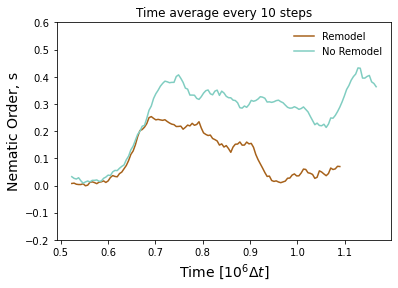

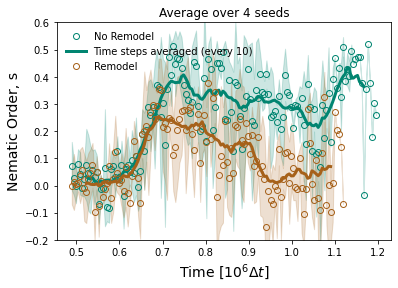

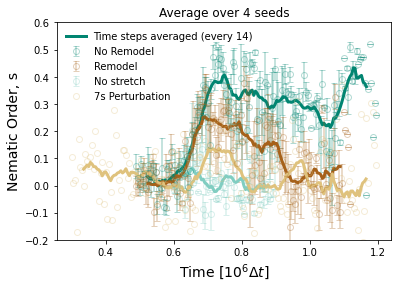

In [8]:
#Master compare

fig2,ax2 = plt.subplots()
N=14
time22 = np.add(time2,0.3) ## shifted the time- think this is ok as long as network is conncted (have checked, it is!)
#averageNR = average
#std_devNR = std_dev
clrs0 = ['#a6611a','#dfc27d','#80cdc1','#018571','steelblue','slateblue']
#time1 = np.linspace(489600,global_tend,len(average))*(1/10**6)
averageNEQAv = np.convolve(averageNEQ, np.ones(N)/N, mode='valid')
averageNSAv = np.convolve(averageNS, np.ones(N)/N, mode='valid')
averageAv = np.convolve(averageNR, np.ones(N)/N, mode='valid')
average7SAv = np.convolve(average7S, np.ones(N)/N, mode='valid')
ax2.plot(time0[int(N/2):-int(N/2)+1],averageNEQAv,color = clrs0[0],label = 'Remodel')
#ax2.fill_between(time0[int(N/2):-int(N/2)+1],np.add(averageNEQ,std_devNEQ),np.add(averageNEQ,-std_devNEQ),color = clrs0[0],alpha = 0.2)
ax2.plot(time1[int(N/2):-int(N/2)+1],averageAv,color = clrs0[2],label = 'No Remodel')
#ax2.fill_between(time1[int(N/2):-int(N/2)+1],np.add(average,std_dev),np.add(average,-std_dev),color = clrs0[2],alpha = 0.2)
ax2.set_title('Time average every 10 steps')
ax2.set_ylabel("Nematic Order, s",fontsize = fs)
ax2.set_xlabel(r"Time [$10^6\Delta t$]",fontsize =fs)
ax2.set_ylim([-0.2,0.6])
ax2.legend(frameon=False)


fig,ax = plt.subplots()


ax.plot(time1,averageNR,color = clrs0[3],marker = 'o',fillstyle='none',linestyle = '',label = 'No Remodel')
ax.plot(time1[int(N/2):-int(N/2)+1],averageAv,color = clrs0[3],linewidth = 3,label = 'Time steps averaged (every 10)')
ax.fill_between(time1,np.add(averageNR,std_devNR),np.add(averageNR,-std_devNR),color = clrs0[3],alpha = 0.2)
ax.plot(time0,averageNEQ,color = clrs0[0],marker = 'o',fillstyle='none',linestyle = '',label = 'Remodel')
ax.plot(time0[int(N/2):-int(N/2)+1],averageNEQAv,color = clrs0[0],linewidth = 3)
ax.fill_between(time0,np.add(averageNEQ,std_devNEQ),np.add(averageNEQ,-std_devNEQ),color = clrs0[0],alpha = 0.2)
ax.set_title('Average over 4 seeds')
ax.set_ylabel("Nematic Order, s",fontsize = fs)
ax.set_xlabel(r"Time [$10^6\Delta t$]",fontsize =fs)
ax.set_ylim([-0.2,0.6])
ax.legend(frameon=False)

#fig.savefig(plotsdir+"average4seeds_remodel_none.pdf")



fig3,ax3 = plt.subplots()

ax3.errorbar(time1,averageNR,yerr = std_devNR/2,capsize = 3,color = clrs0[3],marker = 'o',fillstyle='none',linestyle = '',label = 'No Remodel',alpha = 0.3)
ax3.plot(time1[int(N/2):-int(N/2)+1],averageAv,color = clrs0[3],linewidth = 3,label = 'Time steps averaged (every 14)')
#ax.fill_between(time1,np.add(average,std_dev),np.add(average,-std_dev),color = clrs0[3],alpha = 0.2)
ax3.errorbar(time0,averageNEQ,yerr = std_devNEQ/2,capsize = 3,color = clrs0[0],marker = 'o',fillstyle='none',linestyle = '',label = 'Remodel',alpha = 0.3)
ax3.plot(time0[int(N/2):-int(N/2)+1],averageNEQAv,color = clrs0[0],linewidth = 3)

ax3.errorbar(time22,averageNS,yerr = std_devNS/2,capsize = 3,color = clrs0[2],marker = 'o',fillstyle='none',linestyle = '',label = 'No stretch',alpha = 0.3)
ax3.plot(time22[int(N/2):-int(N/2)+1],averageNSAv,color = clrs0[2],linewidth = 3)

ax3.errorbar(time3,average7S,capsize = 3,color = clrs0[1],marker = 'o',fillstyle='none',linestyle = '',label = '7s Perturbation',alpha = 0.3)
ax3.plot(time3[int(N/2):-int(N/2)+1],average7SAv,color = clrs0[1],linewidth = 3)


#ax.fill_between(time0,np.add(averageNEQ,std_devNEQ),np.add(averageNEQ,-std_devNEQ),color = clrs0[0],alpha = 0.2)
ax3.set_title('Average over 4 seeds')
ax3.set_ylabel("Nematic Order, s",fontsize = fs)
ax3.set_xlabel(r"Time [$10^6\Delta t$]",fontsize =fs)
ax3.set_ylim([-0.2,0.6])
ax3.legend(frameon=False)

#fig3.savefig(plotsdir+"average4seeds_remodel_noneErrbrs.pdf")

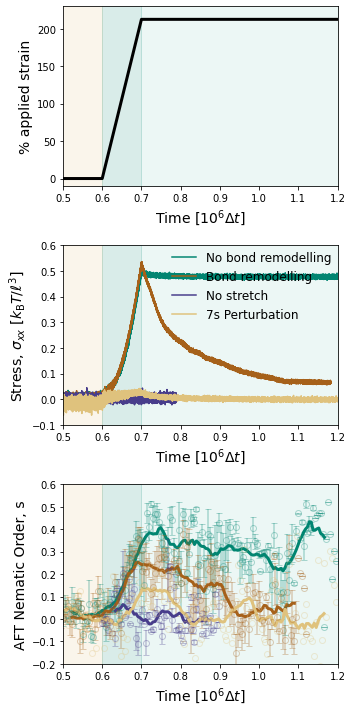

In [9]:
fig,ax = plt.subplots(3,1,figsize = (5,10))
t_mix=100000/10**6
t_stretch=100000/10**6
t_relax=500000/10**6
t_bonds=500000/10**6
strain = 350/164.544827
#Setting up Plotting 
alph = 0.15
UBS = [250,0.6,0.6]
LBS = [-20,-0.1,-0.2]
#fig,ax=plt.subplots(4,1,figsize = (6,12))
for i in range(3):
    #ax[i].fill_between([0,t_mix],[LBS[i],LBS[i]],[UBS[i],UBS[i]],alpha = alph,color = clrs[0])
    ax[i].fill_between([t_mix,t_bonds+t_mix],[LBS[i],LBS[i]],[UBS[i],UBS[i]],alpha = alph,color = clrs[1])
    ax[i].fill_between([t_bonds+t_mix,t_stretch+t_bonds+t_mix],[LBS[i],LBS[i]],[UBS[i],UBS[i]],alpha = alph,color = clrs[3])
    ax[i].fill_between([t_stretch+t_bonds+t_mix,t_relax+t_stretch+t_bonds+t_mix],[LBS[i],LBS[i]],[UBS[i],UBS[i]],alpha = alph,color = clrs[2])
    #ax[i].set_xlim([20000,t_relax+t_stretch+t_bonds+t_mix])
    ax[i].set_xlim([0.5,1.2])


times = [0,t_mix,t_mix+t_bonds,t_mix+t_bonds+t_stretch,t_mix+t_bonds+t_stretch+t_relax]

#text1 = "Mix protomers"
#text2 = "Equilibrate \nbonds"
#text3 = "Apply strain"
#text4 = "Equilibrate \nat strain"
#fs1 = 15
#fs2 = 18
#ax[0].text(-1000,75,text1,color = clrs[0],fontsize =fs1,fontweight='bold')
#ax[0].text(t_mix+200000,20,text2,color = clrs[1],fontsize =fs1,fontweight='bold')
#ax[0].text(t_bonds+t_mix-98000,75,text3,color = clrs[2],fontsize =fs1,fontweight='bold')
#ax[0].text(t_bonds+t_mix+100000,20,text4,color = clrs[3],fontsize =fs1,fontweight='bold')

#Plotting protocol

strains  = [0,0,0,100*strain,100*strain]
ax[0].set_ylabel("% applied strain",fontsize =fs)
#ax[0].set_xlabel(r"time [$\Delta t$]",fontsize =fs1)
ax[0].plot(times,strains,color = "black",linewidth = 3)
ax[0].set_xlabel(r"Time [$10^6\Delta t$]",fontsize =fs)
ax[0].set_ylim([-10,230])

filename = 'stressprofile0.0.dat'
stressNoRem = pandas.read_csv(datadir0+filename, sep = ' ', header = 'infer')
Time = stressNoRem.Time
stresNR = stressNoRem.stressX 

filename2 = 'stressprofile0.003.dat'
stressRem = pandas.read_csv(datadir0+filename2, sep = ' ', header = 'infer')
TimeR = stressRem.Time
stresR = stressRem.stressX 

filename3 = 'stressprofile7sPertNEQ.dat'
stress7s = pandas.read_csv(datadir0+filename3, sep = ' ', header = 'infer')
Time7s = stress7s.Time
stres7s = stress7s.stressX 

startT = int(489600/(Time[5]-Time[4]))
startT = int(489600/(Time[5]-Time[4]))
#ax[1].plot(np.divide(Time7s[startT:],10**6),stres7s[startT:],color = clrs0[1],label = '7s Perturbation')
ax[1].plot(np.divide(Time[startT:],10**6),stresNR[startT:],color = clrs0[3],label = 'No bond remodelling')
ax[1].plot(np.divide(TimeR[startT:],10**6),stresR[startT:],color = clrs0[0],label = 'Bond remodelling')
#ax[1].plot(np.divide(Time7s[startT:],10**6),stres7s[startT:],color = clrs0[1],label = '7s Perturbation')
ax[1].plot(np.add(np.divide(TimeR[:startT],10**6),0.3),stresR[:startT],color = 'darkslateblue',label = 'No stretch')
ax[1].plot(np.divide(Time7s[startT:],10**6),stres7s[startT:],color = clrs0[1],label = '7s Perturbation')

ax[1].set_ylim([-0.1,0.6])
ax[1].set_xlim([0.5,1.2])
ax[1].legend(frameon=False,fontsize = 12,loc = [0.38,0.55])
ax[1].set_xlabel(r"Time [$10^6\Delta t$]",fontsize =fs)
ax[1].set_ylabel(r"Stress, $\sigma_{xx} ~[k_{\mathrm{B}}T/\ell^{3}$]",fontsize =fs)
ax[2].errorbar(time1,averageNR,yerr = std_devNR/2,capsize = 3,color = clrs0[3],marker = 'o',fillstyle='none',linestyle = '',label = 'No Remodel',alpha = 0.3)
ax[2].plot(time1[int(N/2):-int(N/2)+1],averageAv,color = clrs0[3],linewidth = 3,label = 'Time steps averaged (every 14)')
#ax.fill_between(time1,np.add(average,std_dev),np.add(average,-std_dev),color = clrs0[3],alpha = 0.2)
ax[2].errorbar(time0,averageNEQ,yerr = std_devNEQ/2,capsize = 3,color = clrs0[0],marker = 'o',fillstyle='none',linestyle = '',label = 'Remodel',alpha = 0.3)
ax[2].plot(time0[int(N/2):-int(N/2)+1],averageNEQAv,color = clrs0[0],linewidth = 3)

ax[2].errorbar(time22,averageNS,yerr = std_devNS/2,capsize = 3,color = 'darkslateblue',marker = 'o',fillstyle='none',linestyle = '',label = 'No stretch',alpha = 0.3)
ax[2].plot(time22[int(N/2):-int(N/2)+1],averageNSAv,color = 'darkslateblue',linewidth = 3)

ax[2].errorbar(time3,average7S,capsize = 3,color = clrs0[1],marker = 'o',fillstyle='none',linestyle = '',label = '7s Perturbation',alpha = 0.3)
ax[2].plot(time3[int(N/2):-int(N/2)+1],average7SAv,color = clrs0[1],linewidth = 3)

#ax.fill_between(time0,np.add(averageNEQ,std_devNEQ),np.add(averageNEQ,-std_devNEQ),color = clrs0[0],alpha = 0.2)
#ax[2].set_title('Average over 4 seeds')
#ax[2].set_title('AFT analys')
ax[2].set_ylabel("AFT Nematic Order, s",fontsize = fs)
ax[2].set_xlabel(r"Time [$10^6\Delta t$]",fontsize =fs)
ax[2].set_ylim([-0.2,0.6])
ax[2].set_xlim([0.5,1.2])
#ax[2].legend(frameon=False)
fig.tight_layout()
#fig.savefig(plotsdir+'masterfig_AFT_stress.pdf')

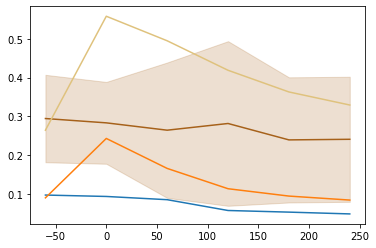

In [10]:
filename = 'DataForBillie.xlsx'
times = [-60,0,60,120,180,240]
#Nostretch = pandas.read_csv(datadir0+filename,usecols = [0,1,2,3,4,5],skiprows =[0],header = 'infer')
for i in range(4):
    #print(i)
    #OP = pandas.read_excel(datadir0+filename,usecols = [0+i*6,1+i*6,2+i*6,3+i*6,4+i*6,5+i*6],header = 1)
    #print(OP)
#print(Nostretch.anchor)
#print(Nostretch.min0)
    anchor =np.nanmean(pandas.read_excel(datadir0+filename,usecols = [0+i*6],header = 1))
    min0 = np.nanmean(pandas.read_excel(datadir0+filename,usecols = [1+i*6],header = 1))
    min60 = np.nanmean(pandas.read_excel(datadir0+filename,usecols = [2+i*6],header = 1))
    min120 = np.nanmean(pandas.read_excel(datadir0+filename,usecols = [3+i*6],header = 1))
    min180 = np.nanmean(pandas.read_excel(datadir0+filename,usecols = [4+i*6],header = 1))
    min240 = np.nanmean(pandas.read_excel(datadir0+filename,usecols = [5+i*6],header = 1))
    
    anchorstd =np.nanstd(pandas.read_excel(datadir0+filename,usecols = [0+i*6],header = 1))
    min0std = np.nanstd(pandas.read_excel(datadir0+filename,usecols = [1+i*6],header = 1))
    min60std = np.nanstd(pandas.read_excel(datadir0+filename,usecols = [2+i*6],header = 1))
    min120std = np.nanstd(pandas.read_excel(datadir0+filename,usecols = [3+i*6],header = 1))
    min180std = np.nanstd(pandas.read_excel(datadir0+filename,usecols = [4+i*6],header = 1))
    min240std = np.nanstd(pandas.read_excel(datadir0+filename,usecols = [5+i*6],header = 1))

    if i ==0:
        OPs_NoStretch = [anchor,min0,min60,min120,min180,min240]
        OPs_NoStretchstd = [anchorstd,min0std,min60std,min120std,min180std,min240std]
    if i ==1:
        OPs_Stretch = [anchor,min0,min60,min120,min180,min240]
        OPs_Stretchstd = [anchorstd,min0std,min60std,min120std,min180std,min240std]
    if i==2:
        OPs7s_NoStretch = [anchor,min0,min60,min120,min180,min240]
        OPs7s_NoStretchstd = [anchorstd,min0std,min60std,min120std,min180std,min240std]
    if i==3:
        OPs7s_Stretch = [anchor,min0,min60,min120,min180,min240]
        OPs7s_Stretchstd = [anchorstd,min0std,min60std,min120std,min180std,min240std]
fig,ax = plt.subplots()
#print(min0)
#print(OPs_NoStretch)
ax.plot(times,OPs_NoStretch,color=clrs[0])
ax.fill_between(times, np.subtract(OPs_NoStretch,OPs_NoStretchstd),np.add(OPs_NoStretch,OPs_NoStretchstd),color=clrs[0],alpha=0.2)
ax.plot(times,OPs_Stretch,color=clrs[1])
ax.plot(times,OPs7s_NoStretch)
ax.plot(times,OPs7s_Stretch)

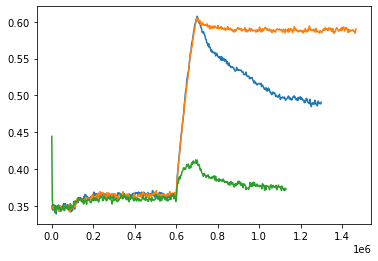

In [11]:
filename = 'alignmentNoRemodel.dat'
AlignNoRem = pandas.read_csv(datadir0+filename, sep = ' ', header = 'infer')
TimeAl_ = AlignNoRem.Time
AlignNR_ = AlignNoRem.AvMSq
TimeAl=TimeAl_.values
AlignNR = AlignNR_.values

filename2 = 'alignmentRemodelNEQ.dat'
AlignRem = pandas.read_csv(datadir0+filename2, sep = ' ', header = 'infer')
TimeAlR_ = AlignRem.Time
AlignR_ = AlignRem.AvMSq
AlignR=AlignR_.values
TimeAlR = TimeAlR_.values

filename3 = 'alignment7s.dat'
Align7s = pandas.read_csv(datadir0+filename3, sep = ' ', header = 'infer')
TimeAl7s = Align7s.Time
Align7s = Align7s.AvMSq
frame=2400
fig,ax = plt.subplots()
ax.plot(np.multiply(TimeAlR,frame),AlignR)
ax.plot(np.multiply(TimeAl,frame),AlignNR)
ax.plot(np.multiply(TimeAl7s,frame),Align7s)


## Master Plot

1.2984


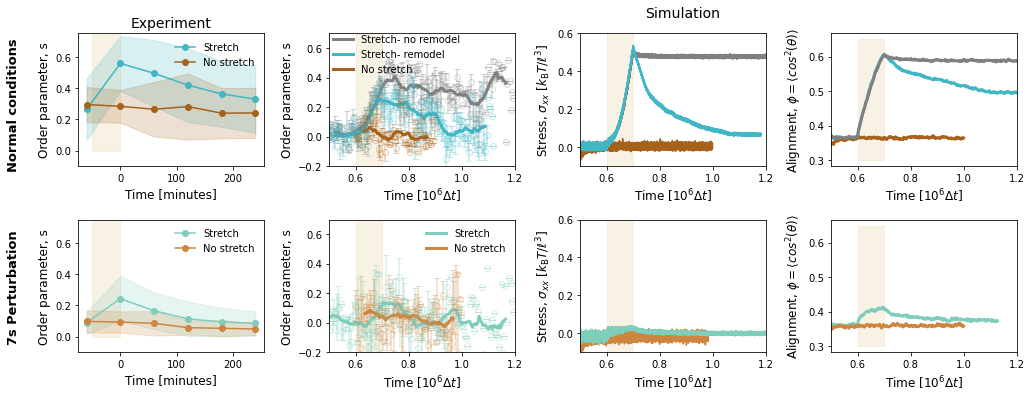

In [12]:
fig,ax = plt.subplots(2,4,figsize = (14,5.5))

# setting up axes
clrs = ['#a6611a','#dfc27d','#41b6c4','#7fcdbb','peru','slateblue']
ax[0,0].set_ylabel('Order parameter, s',fontsize = 12)
ax[1,0].set_ylabel('Order parameter, s',fontsize = 12)
ax[0,1].set_ylabel('Order parameter, s',fontsize = 12)
ax[1,1].set_ylabel('Order parameter, s',fontsize = 12)
ax[0,2].set_ylabel(r"Stress, $\sigma_{xx} ~[k_{\mathrm{B}}T/\ell^{3}$]",fontsize =12)
ax[1,2].set_ylabel(r"Stress, $\sigma_{xx} ~[k_{\mathrm{B}}T/\ell^{3}$]",fontsize =12)
ax[1,3].set_ylabel(r'Alignment, $\phi=\langle cos^{2}(\theta)\rangle$',fontsize =12)
ax[0,3].set_ylabel(r'Alignment, $\phi=\langle cos^{2}(\theta)\rangle$',fontsize =12)
ax[0,0].set_title('Experiment',fontsize = 14)
#ax[0,1].set_title('Simulation',fontsize = 12)

fig.text(0.65, 0.97, 'Simulation', ha='center',fontsize = 14)
fig.text(-0.02, 0.75, 'Normal conditions', va='center', rotation='vertical',fontsize = 13,weight="bold")
fig.text(-0.02, 0.29, '7s Perturbation', va='center', rotation='vertical',fontsize = 13,weight="bold")


t_mix=100000/10**6
t_stretch=100000/10**6
t_relax=500000/10**6
t_bonds=500000/10**6
strain = 350/164.544827
#Setting up Plotting 
alph = 0.2
UBS = [1,0.7,0.6,0.65]
LBS = [-0.2,-0.2,-0.1,0.3]
#fig,ax=plt.subplots(4,1,figsize = (6,12))
for i in range(2):
    for jj in range(3):
        j = jj+1
        #ax[i].fill_between([0,t_mix],[LBS[i],LBS[i]],[UBS[i],UBS[i]],alpha = alph,color = clrs[0])
        #ax[i,j].fill_between([t_mix,t_bonds+t_mix],[LBS[j],LBS[j]],[UBS[j],UBS[j]],alpha = alph,color = clrs[1])
        ax[i,j].fill_between([t_bonds+t_mix,t_stretch+t_bonds+t_mix],[LBS[j],LBS[j]],[UBS[j],UBS[j]],alpha = alph,color = clrs[1])
        #ax[i,j].fill_between([t_stretch+t_bonds+t_mix,t_relax+t_stretch+t_bonds+t_mix],[LBS[j],LBS[j]],[UBS[j],UBS[j]],alpha = alph,color = clrs[2])
        #ax[i].set_xlim([20000,t_relax+t_stretch+t_bonds+t_mix])
        if j<3:
            ax[i,j].set_ylim([-0.2,0.7])
        ax[i,j].set_xlim([0.5,1.2])



## Plotting experiment

ax[0,0].set_ylim([-0.1,0.75])
ax[0,0].fill_between([-50,0],[0,0],[1,1],color = clrs[1],alpha = 0.2)
ax[1,0].set_ylim([-0.1,0.75])
ax[1,0].fill_between([-50,0],[0,0],[1,1],color = clrs[1],alpha = 0.2)

ax[0,0].plot(times,OPs_Stretch,color=clrs[2],marker = 'o',label = 'Stretch')
ax[0,0].fill_between(times, np.subtract(OPs_Stretch,OPs_Stretchstd),np.add(OPs_Stretch,OPs_Stretchstd),color=clrs[2],alpha=0.2)
ax[0,0].plot(times,OPs_NoStretch,color=clrs[0],marker = 'o',label = 'No stretch')
ax[0,0].fill_between(times, np.subtract(OPs_NoStretch,OPs_NoStretchstd),np.add(OPs_NoStretch,OPs_NoStretchstd),color=clrs[0],alpha=0.2)

ax[0,0].legend(frameon=False)


ax[1,0].plot(times,OPs7s_Stretch,color = clrs[3],marker = 'o',label = 'Stretch')
ax[1,0].fill_between(times, np.subtract(OPs7s_Stretch,OPs7s_Stretchstd),np.add(OPs7s_Stretch,OPs7s_Stretchstd),color=clrs[3],alpha=0.2)
ax[1,0].plot(times,OPs7s_NoStretch,color = clrs[4],label = 'No stretch',marker = 'o')
ax[1,0].fill_between(times, np.subtract(OPs7s_NoStretch,OPs7s_NoStretchstd),np.add(OPs7s_NoStretch,OPs7s_NoStretchstd),color=clrs[4],alpha=0.2)
ax[1,0].legend(frameon=False)

ax[0,0].set_xlabel('Time [minutes]',fontsize =12)
ax[1,0].set_xlabel('Time [minutes]',fontsize =12)


## Plotting simulation

ax[0,1].errorbar(time1,averageNR,yerr = std_devNR/2,capsize = 3,color = 'grey',marker = 'o',fillstyle='none',linestyle = '',alpha = 0.3)
ax[0,1].plot(time1[int(N/2):-int(N/2)+1],averageAv,color = 'grey',linewidth = 3,label = 'Stretch- no remodel')

ax[0,1].errorbar(time0,averageNEQ,yerr = std_devNEQ/2,capsize = 3,color = clrs[2],marker = 'o',fillstyle='none',linestyle = '',alpha = 0.3)
ax[0,1].plot(time0[int(N/2):-int(N/2)+1],averageNEQAv,color = clrs[2],linewidth = 3,label = 'Stretch- remodel')

ax[0,1].errorbar(time22,averageNS,yerr = std_devNS/2,capsize = 3,color = clrs[0],marker = 'o',fillstyle='none',linestyle = '',alpha = 0.3)
ax[0,1].plot(time22[int(N/2):-int(N/2)+1],averageNSAv,color = clrs[0],linewidth = 3,label = 'No stretch')
endTT=100
ax[1,1].errorbar(time3,average7S,yerr = std_dev7S,capsize = 3,color =  clrs[3],marker = 'o',fillstyle='none',linestyle = '',alpha = 0.3)
ax[1,1].errorbar(np.add(time3[:-endTT],0.3),average7S[:-endTT],yerr = std_dev7S[:-endTT],capsize = 3,color =  clrs[4],marker = 'o',fillstyle='none',linestyle = '',alpha = 0.3)
ax[1,1].plot(time3[int(N/2):-int(N/2)+1],average7SAv,color =  clrs[3],linewidth = 3,label = 'Stretch')
ax[1,1].plot(np.add(time3[int(N/2):-endTT-int(N/2)+1],0.3),average7SAv[:-endTT],color =  clrs[4],linewidth = 3,label = 'No stretch')
ax[1,1].legend(frameon=False)
ax[0,1].legend(frameon=False,loc = [0.,0.66])


startTT = int(600000/(Time[5]-Time[4]))
startT = int(489600/(Time[5]-Time[4]))
endT = int(689600/(Time[5]-Time[4]))
ax[0,2].plot(np.add(np.divide(TimeR[:startTT],10**6),0.4),stresR[:startTT],color =  clrs[0],label = 'No stretch')
ax[0,2].plot(np.divide(Time[startT:],10**6),stresNR[startT:],color = 'grey')
ax[0,2].plot(np.divide(TimeR[startT:],10**6),stresR[startT:],color =  clrs[2],label = 'Bond remodelling')
ax[1,2].plot(np.add(np.divide(Time7s[:-endT],10**6),0.4),stres7s[:-endT],color = clrs[4],label = 'No stretch')
ax[1,2].plot(np.divide(Time7s[startT:],10**6),stres7s[startT:],color = clrs[3],label = 'Stretch')

ax[0,3].plot(np.divide(np.multiply(TimeAlR,frame),10**6),AlignR,color = clrs[2],linewidth=3)
ax[0,3].plot(np.add(np.divide(np.multiply(TimeAlR[:-290],frame),10**6),0.4),AlignR[:-290],color = clrs[0],linewidth=3)
ax[0,3].plot(np.divide(np.multiply(TimeAl,frame),10**6),AlignNR,color = 'grey',linewidth=3)

ax[1,3].plot(np.divide(np.multiply(TimeAl7s,frame),10**6),Align7s,color = clrs[3],linewidth=3)
ax[1,3].plot(np.add(np.divide(np.multiply(TimeAl7s[10:-220],frame),10**6),0.4),Align7s[10:-220],color = clrs[4],linewidth=3)
#ax[0,3].plot(np.add(np.divide(np.multiply(TimeAl,frame),10**6),0.6),AlignR,color = clrs[4])
print(np.divide(np.multiply(TimeAlR[-1],frame),10**6))

ax[0,2].set_ylim([-0.1,0.6])
ax[1,2].set_ylim([-0.1,0.6])
#ax[1,2].legend(frameon=False,loc = [0.,0.66])

ax[0,1].set_xlabel(r"Time [$10^6\Delta t$]",fontsize =12)
ax[0,2].set_xlabel(r"Time [$10^6\Delta t$]",fontsize =12)
ax[1,1].set_xlabel(r"Time [$10^6\Delta t$]",fontsize =12)
ax[1,2].set_xlabel(r"Time [$10^6\Delta t$]",fontsize =12)
ax[0,3].set_xlabel(r"Time [$10^6\Delta t$]",fontsize =12)
ax[1,3].set_xlabel(r"Time [$10^6\Delta t$]",fontsize =12)

fig.tight_layout()

plotname = 'Master_exp_sim_AFT_mech.pdf'
fig.savefig(plotsdir+plotname)
